In [14]:
using StatsPlots, Statistics, Distributions, Random

In [70]:
n_bins = 8
n_RVs = 1000

μ = 4

RV_list = Array{Distribution}(undef, n_RVs)

for i = 1:n_RVs
    temp_RV = Exponential(μ)
    RV_list[i] = temp_RV
end

In [71]:
function generate_midpoints(n_bins)
    quantiles = Array{Float64}(undef, n_bins)

    #generate the quantile midpoints
    for i = 1:n_bins
        quantiles[i] = i/n_bins - (1/2)*(1/n_bins)
    end

    return vec(quantiles)
end

generate_midpoints (generic function with 1 method)

In [72]:
function add_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] + list2[i]
    end
    
    return vec(sort(sum_list))
end

add_distributions (generic function with 1 method)

In [73]:
function re_bin(distribution, n_bins)
    rebinned = reshape(distribution, n_bins, n_bins)
    rebinned = mean(rebinned, dims = 1)
    
    return vec(rebinned)
end

re_bin (generic function with 1 method)

In [74]:
quantile_boundaries = generate_midpoints(n_bins)
println(quantile_boundaries)

final_RV = pop!(RV_list)
final_RV = quantile(final_RV, quantile_boundaries)
println(final_RV)

for RV in RV_list
    temp_list = quantile(RV, quantile_boundaries)
    
    final_RV = add_distributions(temp_list, final_RV)
    final_RV = re_bin(final_RV, n_bins) 
end

[0.0625, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 0.9375]
[0.2581540845502847, 0.830557459112978, 1.4987737977656428, 2.301456579614247, 3.3067142927378717, 4.6526032392227235, 6.695905734286686, 11.090354888959125]


In [75]:
println("Expected average (n*μ): ", n_RVs*μ)
println("Computed average: ", mean(final_RV))

println("Normalized error: ", (n_RVs*μ - mean(final_RV))/n_RVs*μ)

Expected average (n*μ): 4000
Computed average: 3829.3150095312285
Normalized error: 0.682739961875086


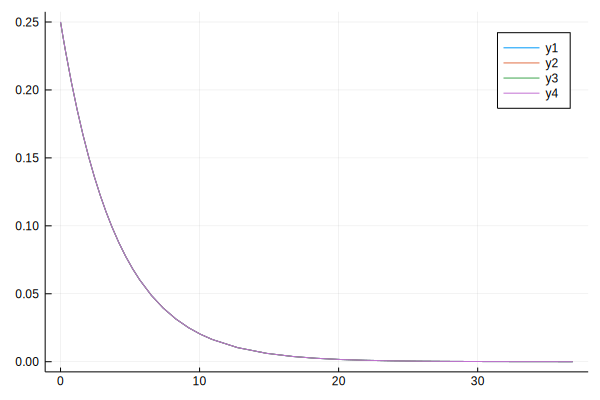

In [60]:
plot!(Exponential(θ))